In [22]:
#from config import api_key
from citipy import citipy
import random
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import openweathermapy.core as ow
plt.style.use("seaborn")

In [23]:
#all lon and lat in 20 point quadrants 
lat_quad = np.arange(-90,90,15)
long_quad = np.arange(-180,180,15)

#make data frame
city_df = pd.DataFrame()
city_df["Latitude"] = ""
city_df["Longitude"] = ""

for x in lat_quad:
    for y in long_quad:
        x_sector = list(np.arange(x,x+15,.01))
        lats = random.sample(x_sector,40)
        y_sector = list(np.arange(y,y+15,.01))
        longs = random.sample(y_sector,40)
        city_df = city_df.append(pd.DataFrame.from_dict({"Latitude":lats,"Longitude":longs }))
city_df = city_df.reset_index(drop=True)



In [24]:
#use citipy to find cities
city_df["City name"] =""
city_df["Country code"]=""
for index,row in city_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    city_df.set_value(index,"City name", city.city_name)
    city_df.set_value(index,"Country code", city.country_code)


In [26]:
#get rid of longitude and latitude
cityname_df = city_df.drop(['Latitude','Longitude'],axis = 1)
cityname_df = cityname_df.drop_duplicates()
#get 500 sample cities
sample_cities = cityname_df.sample(500)
sample_cities = sample_cities.reset_index(drop=True)

In [27]:
#Getting WeatherMap info
base_url = "http://api.openweathermap.org/data/2.5/weather"
app_id = "fa51096b3ebd6b49bfe3abd217f9bef4"
params = { "appid" :app_id,"units":"metric" }

for index,row in sample_cities.iterrows():
    params["q"] = f'{row["City name"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather = requests.get(base_url,params)
    print(city_weather.url)
    city_weather  = city_weather.json()
    sample_cities.set_value(index,"Latitude",city_weather.get("coord",{}).get("lat"))
    sample_cities.set_value(index,"Longitude",city_weather.get("coord",{}).get("lon"))
    sample_cities.set_value(index,"Temperature",city_weather.get("main",{}).get("temp_max"))
    sample_cities.set_value(index,"Wind speed",city_weather.get("wind",{}).get("speed"))
    sample_cities.set_value(index,"Humidity",city_weather.get("main",{}).get("humidity"))
    sample_cities.set_value(index,"Cloudiness",city_weather.get("clouds",{}).get("all"))

Retrieving weather information for tukrah
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=tukrah
Retrieving weather information for tokur
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=tokur
Retrieving weather information for tabuk
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=tabuk
Retrieving weather information for fort smith
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=fort+smith
Retrieving weather information for pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=pontes+e+lacerda
Retrieving weather information for mount isa
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=mount+isa
Retrieving weather information for simpang
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=shirgaon
Retrieving weather information for leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=leningradskiy
Retrieving weather information for shelburne
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=shelburne
Retrieving weather information for puerto narino
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=puerto+narino
Retrieving weather information for moyeuvre-grande
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=moyeuvre-grande
Retrieving weather information for grand centre
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=grand+centre
Retrieving weather information for isangel
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=boa+vista
Retrieving weather information for adrar
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=adrar
Retrieving weather information for clarence town
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=clarence+town
Retrieving weather information for baruun-urt
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=baruun-urt
Retrieving weather information for galiwinku
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=galiwinku
Retrieving weather information for beaufort
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=beaufort
Retrieving weather information for alur
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=aden
Retrieving weather information for ilebo
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=ilebo
Retrieving weather information for kirac
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=kirac
Retrieving weather information for pedernales
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=pedernales
Retrieving weather information for taiyuan
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=taiyuan
Retrieving weather information for zabid
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=zabid
Retrieving weather information for ubinskoye
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=met

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=abha
Retrieving weather information for kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=kloulklubed
Retrieving weather information for atbasar
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=atbasar
Retrieving weather information for lincoln
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=lincoln
Retrieving weather information for ca mau
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=ca+mau
Retrieving weather information for arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=arraial+do+cabo
Retrieving weather information for kalispell
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=tortoli
Retrieving weather information for tuscaloosa
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=tuscaloosa
Retrieving weather information for kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=kavaratti
Retrieving weather information for puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=puerto+ayora
Retrieving weather information for siguiri
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=siguiri
Retrieving weather information for shirokiy
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=shirokiy
Retrieving weather information for mananara
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=ilhabela
Retrieving weather information for asosa
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=asosa
Retrieving weather information for tahe
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=tahe
Retrieving weather information for giyani
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=giyani
Retrieving weather information for tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=tilichiki
Retrieving weather information for panjab
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=panjab
Retrieving weather information for itarema
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metri

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=xacmaz
Retrieving weather information for moindou
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=moindou
Retrieving weather information for agara
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=agara
Retrieving weather information for andevoranto
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=andevoranto
Retrieving weather information for les cayes
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=les+cayes
Retrieving weather information for el jicaro
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=el+jicaro
Retrieving weather information for suntar
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd21

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=melendugno
Retrieving weather information for lawar
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=lawar
Retrieving weather information for chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=chernyshevskiy
Retrieving weather information for dubbo
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=dubbo
Retrieving weather information for zabaykalsk
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=zabaykalsk
Retrieving weather information for abu kamal
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=abu+kamal
Retrieving weather information for maridi
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49b

http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=jackson
Retrieving weather information for behbahan
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=behbahan
Retrieving weather information for mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=mys+shmidta
Retrieving weather information for lubao
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=lubao
Retrieving weather information for romitan
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=romitan
Retrieving weather information for huatulco
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9bef4&units=metric&q=huatulco
Retrieving weather information for gumrak
http://api.openweathermap.org/data/2.5/weather?appid=fa51096b3ebd6b49bfe3abd217f9

In [33]:
#save as csv
sample_cities = sample_cities.dropna()
sample_cities.to_csv("City_Weather_Data.csv")


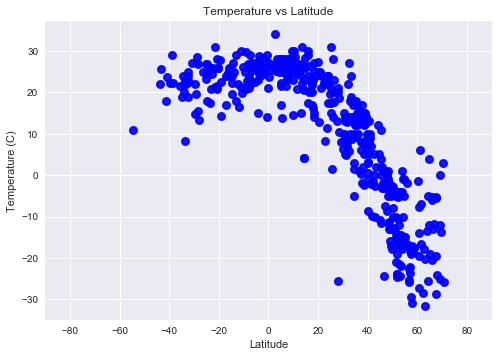

In [29]:
#Temperature vs Latitude
plt.scatter(sample_cities["Latitude"],sample_cities["Temperature"] ,  color = "blue", alpha=0.9, label="Rural", linewidth=2)
#labels
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Temperature vs Latitude", loc="center")
plt.xlim( (-90, 90) )
plt.show()

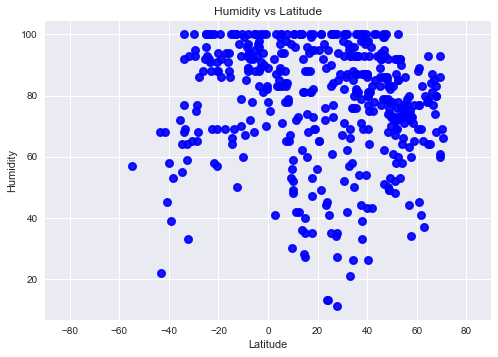

In [30]:
#Humidity vs Latitude
plt.scatter(sample_cities["Latitude"],sample_cities["Humidity"] ,  color = "blue", alpha=0.9, label="Rural", linewidth=2)
#labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude", loc="center")
plt.xlim( (-90, 90) )
plt.show()

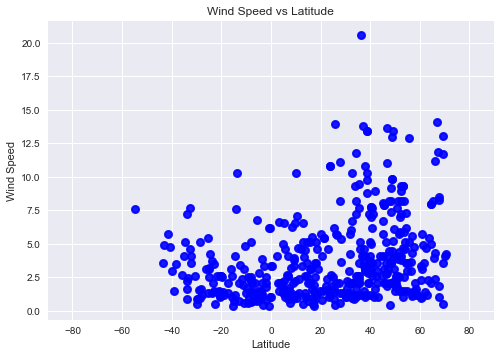

In [31]:
#Wind Speed vs Latitude
plt.scatter(sample_cities["Latitude"],sample_cities["Wind speed"] ,  color = "blue", alpha=0.9, label="Rural", linewidth=2)
#labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude", loc="center")
plt.xlim( (-90, 90) )
plt.show()

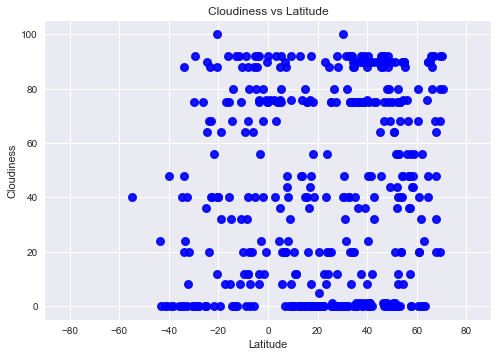

In [32]:
#Cloudiness vs Latitude
plt.scatter(sample_cities["Latitude"],sample_cities["Cloudiness"] ,  color = "blue", alpha=0.9, label="Rural", linewidth=2)
#labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude", loc="center")
plt.xlim( (-90, 90) )
plt.show()

